In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
plt.style.use("paper.mplstyle")

from scipy.optimize import minimize
from scipy.optimize import fmin
from scipy.special import gamma
from scipy.optimize import curve_fit
from scipy.stats import poisson

import dicts

In [2]:
sd_anns   = dicts.sd_ann_rate_dict # annihilation rate for xs=1pb

In [3]:
def round_sig_figs(x, sig_figs=2):
    return round(x, sig_figs-int(np.floor(np.log10(abs(x))))-1)

In [4]:
def factorial(x):
    x = np.asarray(x)
    return gamma(x+1)

In [5]:
def poisson_pdf(k, mu):
    return np.exp(-mu) * np.power(mu, k) / factorial(k)

In [6]:
def neg_llh(mu_s, n_s, mu_b, n_b):
    """
    mu_s float: mean number of signal events
    n_s  int  : observed number of signal events
    mu_b float: mean number of background events
    n_b  int  : observed number of bacground events
    """
    mu_s = np.asarray(mu_s)
    mu_b = np.asarray(mu_b)
    n_b  = np.asarray(n_b)
    n_s  = np.asarray(n_s)
    mu = mu_s*n_s + mu_b*n_b
    lh = -np.log(np.exp(-mu) * np.power(mu, mu_b) / factorial(mu_b))
#     lh = lh[np.where(~np.isnan(lh))]
#     lh = lh[np.where(~np.isinf(lh))]
    return np.sum(lh)

In [7]:
def model(mu_s, n_s, mu_b, n_b):
    mu_s = np.asarray(mu_s)
    mu_b = np.asarray(mu_b)
    n_b  = np.asarray(n_b)
    n_s  = np.asarray(n_s)
    mu = mu_s*n_s + mu_b*n_b
    return np.exp(-mu) * np.power(mu, mu_b) / factorial(mu_b)

In [8]:
def MLERegression(params, ch, m, dp):
    ns, nb = params[0], params[1]
    delta_t = 30 * 60
    factor  = (1. / m) * sd_anns[m] * 1e-3 * delta_t
    mu_s = factor*np.load("data/e_d_theta_hist/ch%d_m%d_f1.000000_f_tot_e_d_theta_hist.npy" % (ch, m))
    mu_b = np.load("data/e_d_theta_hist/bg_tot_e_d_theta_hist.npy")
    yhat = (ns*mu_s+nb*mu_b)
    neg_llh = -np.log(poisson_pdf(dp, yhat))
    return np.sum(neg_llh)
    

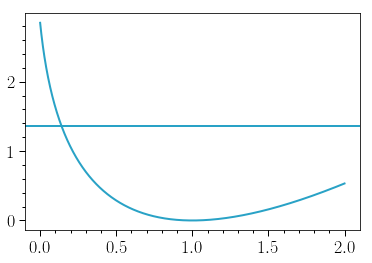

In [9]:
ch   = 5
m    = 1000
n_s  = 1
bnds = ((0, None), (0, None))

delta_t = 30 * 60
factor  = (1. / m) * sd_anns[m] * 1e-3 * delta_t
# print(factor)

signal_hist = factor * np.load("data/e_d_theta_hist/ch%d_m%d_f1.000000_f_tot_e_d_theta_hist.npy" % (ch,m))
bg_hist     = np.load("data/e_d_theta_hist/bg_tot_e_d_theta_hist.npy") 
Ns          = n_s * signal_hist
Nb          = bg_hist
data = (Ns+Nb)

guess=[1.6, 1.1]
results = minimize(MLERegression, guess, 
                   method='L-BFGS-B', 
                   args=(ch,m,data),
                   bounds=bnds,
                   options={'disp': True, "ftol":1e-16})
bf_param = results.x
# print(bf_param)
bf_nb    = results.x[1]
llh0     = MLERegression(bf_param, ch, m, data)

arr = []
for n in np.linspace(0, 2*bf_param[0], 1000):
    arr.append(MLERegression([n,bf_nb], ch, m, data)-llh0)
    
plt.plot(np.linspace(0, 2*bf_param[0], 1000), arr)
plt.axhline(1.355)
plt.show()

In [10]:
plt.plot(i_cut, ns_error, label="rel. ns error")
plt.plot(i_cut, nb_error, label="rel. nb error")
plt.legend()
plt.xlabel("cut index")
plt.ylabel("rel. error")
plt.show()

NameError: name 'i_cut' is not defined

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


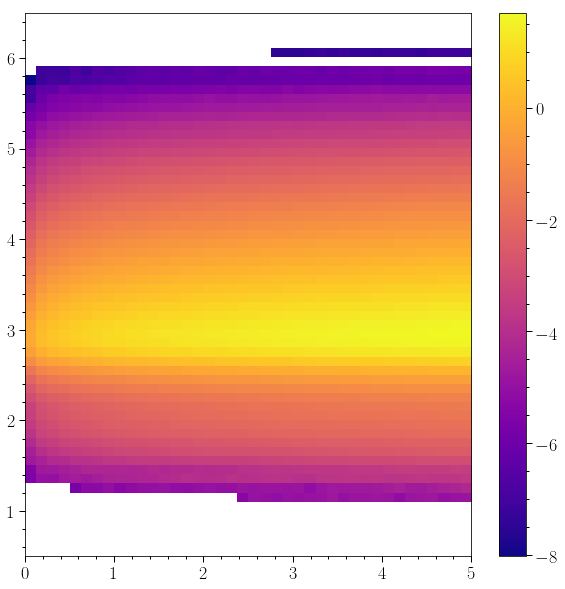

In [55]:
fig, ax = plt.subplots(1, 1, figsize=[10, 10])
im = ax.imshow(
               np.log10(data[:,:40]),
               interpolation='none', 
               aspect="auto",
               extent=[0, 20, 0.5, 6.5]
              )
cbar = fig.colorbar(im, 
#                     cax=axins, 
#                     ticks=makeTicks(log_signal_trim), 
#                     format=ticker.FuncFormatter(tickFmt)
                   )
# cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)
plt.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


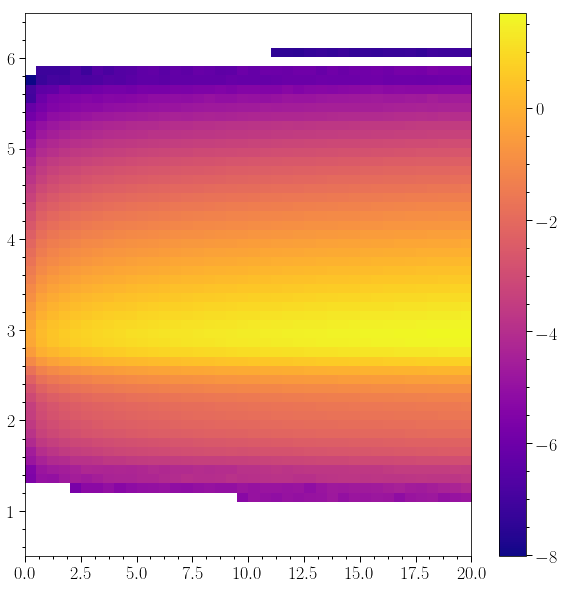

In [58]:
fig, ax = plt.subplots(1, 1, figsize=[10, 10])
im = ax.imshow(
               np.log10(Nb[:,:40]),
               interpolation='none', 
               aspect="auto",
               extent=[0, 20, 0.5, 6.5],
              )
cbar = fig.colorbar(im, 
#                     cax=axins, 
#                     ticks=makeTicks(log_signal_trim), 
#                     format=ticker.FuncFormatter(tickFmt)
                   )
# cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)
plt.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


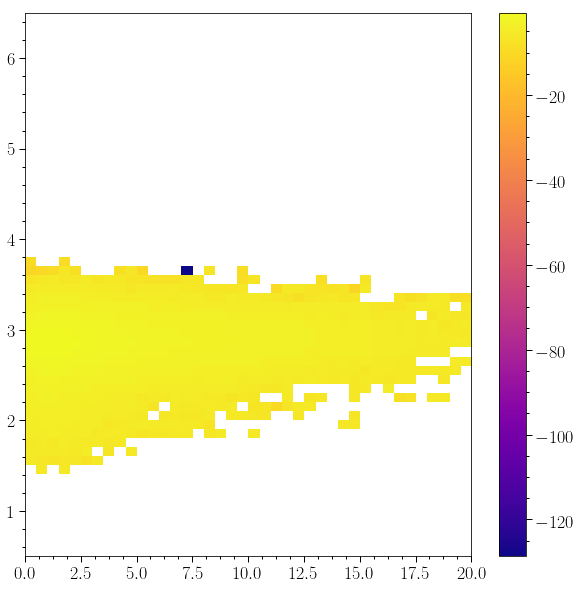

In [56]:
fig, ax = plt.subplots(1, 1, figsize=[10, 10])
im = ax.imshow(
               np.log10(Ns[:,:40]),
               interpolation='none', 
               aspect="auto",
               extent=[0, 20, 0.5, 6.5],
              )
cbar = fig.colorbar(im, 
#                     cax=axins, 
#                     ticks=makeTicks(log_signal_trim), 
#                     format=ticker.FuncFormatter(tickFmt)
                   )
# cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)
plt.show()

In [39]:
nss = np.linspace(0,2,50)
nbs = np.linspace(0,2,50)
nllhs = np.zeros((50,50))
for i,ns in enumerate(nss):
    for j,nb in enumerate(nbs):
        nllhs[i,j] = MLERegression((ns,nb), 5, 1000, data)

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


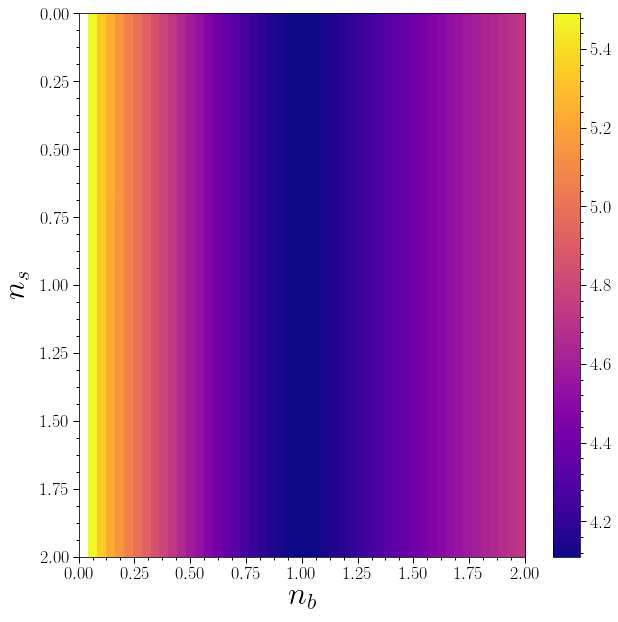

In [70]:
nss = np.linspace(0,2,50)
nbs = np.linspace(0,2,50)
nllhs = np.zeros((50,50))
for i,ns in enumerate(nss):
    for j,nb in enumerate(nbs):
        nllhs[i,j] = MLERegression((ns,nb), 5, 1000, data)

fig, ax = plt.subplots(1, 1, figsize=[10, 10])
im = ax.imshow(
               np.log10(nllhs),
               interpolation='none', 
               aspect="auto",
               extent=[0,2,2,0],
              )

ax.set_xlabel(r"$n_{b}$")
ax.set_ylabel(r"$n_{s}$")


cbar = fig.colorbar(
                    im,
                   )
plt.show()

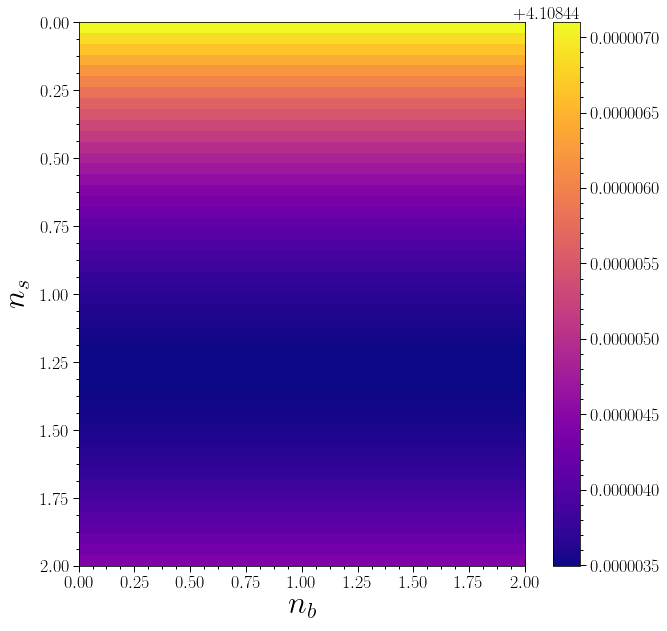

In [71]:
nss = np.linspace(0,2,50)
nbs = np.linspace(0,2,50)
nllhs = np.zeros((50,50))
for i,ns in enumerate(nss):
    for j,nb in enumerate(nbs):
        nllhs[i,j] = MLERegression_prime((ns,nb), 5, 1000, data)
        
fig, ax = plt.subplots(1, 1, figsize=[10, 10])
im = ax.imshow(
               np.log10(nllhs),
               interpolation='none', 
               aspect="auto",
               extent=[0,2,2,0],
              )
cbar = fig.colorbar(
                    im,
                   )

ax.set_xlabel(r"$n_{b}$")
ax.set_ylabel(r"$n_{s}$")

plt.show()